### 1. 라이브러리 호출 및 데이터 불러오기

In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [2]:
final_df = pd.read_csv("C:/Users/thoma/Desktop/호진/t_academy/ml프로젝트/데이터/final_df.csv",index_col=0)

final_df.head()

,goalTime,x,y,type,spId,spGrade,spLevel,spIdType,assist,assistSpId,...,위치 선정,발리 슛,페널티 킥,프리킥,커브,볼 컨트롤,밸런스,헤더,점프,침착성
0,1883,0.922118,0.396405,6,257243061,6,5,True,True,225242881,...,106.0,87.0,87.0,83.0,91.0,98.0,104.0,88.0,95.0,96.0
1,2853,0.934114,0.578460,6,247165889,6,5,True,True,225199231,...,108.0,99.0,102.0,105.0,108.0,101.0,100.0,95.0,107.0,102.0
2,16778137,0.896395,0.379427,6,257243061,6,5,True,True,225242881,...,106.0,87.0,87.0,83.0,91.0,98.0,104.0,88.0,95.0,96.0
3,852,0.904731,0.543141,6,257243061,6,5,True,True,247165889,...,106.0,87.0,87.0,83.0,91.0,98.0,104.0,88.0,95.0,96.0
4,16780164,0.864648,0.498410,6,225242881,6,5,True,True,247199266,...,101.0,94.0,96.0,91.0,94.0,100.0,107.0,93.0,84.0,93.0


### 2. 데이터 전처리

##### 2-1. 추가 컬럼 생성

In [3]:
final_df['점핑 헤더'] = (final_df['헤더'] + final_df['점프'])/2

final_df['distance'] = np.sqrt((final_df['x'] - 1)**2 + (final_df['y'] - 0.5)**2)

In [4]:
final_df = final_df.dropna()

final_df = final_df.drop(['점프', '헤더'], axis = 1)

final_df = final_df.drop(['goalTime','id','spGrade','spId','spLevel','spIdType','name','season','assistSpId','assist','assistX', 'assistY','hitPost','inPenalty'],axis=1)

##### 2-2. 삼진분류 => 이진분류

In [5]:
# 삼진분류

# final_df['result'] = final_df['result'].replace(1, 1) # 유효슛 1 => 1
# final_df['result'] = final_df['result'].replace(2, 2) # 똥슛 2 => 2
# final_df['result'] = final_df['result'].replace(3, 0) # 골 0 => 0 

# 이진분류

final_df['result'] = final_df['result'].replace(1 and 2, 0) # No Goal
final_df['result'] = final_df['result'].replace(3, 1) # Goal

##### 2-3. 컬럼 순서 조정

In [6]:
final_df = final_df[['result','distance','x', 'y', 'type', '포지션', '골 결정력', '슛 파워', '중거리 슛',
       '위치 선정', '발리 슛', '페널티 킥', '프리킥', '커브', '볼 컨트롤', '밸런스', '점핑 헤더',
       '침착성']]

##### 2-4. 상관관계 확인

In [7]:
final_df.corr()

C:\Users\thoma\AppData\Local\Temp\ipykernel_24384\2626907977.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_df.corr()


,result,distance,x,y,type,골 결정력,슛 파워,중거리 슛,위치 선정,발리 슛,페널티 킥,프리킥,커브,볼 컨트롤,밸런스,점핑 헤더,침착성
result,1.000000,-0.123286,0.090597,0.016104,0.092349,0.068129,0.041152,0.050897,0.060621,0.058874,0.047797,0.026160,0.038202,0.027533,0.023438,0.008762,0.027506
distance,-0.123286,1.000000,-0.817509,0.032359,-0.232308,-0.061201,0.075172,0.124970,-0.037108,-0.035053,0.007494,0.115165,0.076691,0.051251,0.004465,-0.094890,-0.001169
x,0.090597,-0.817509,1.000000,-0.026321,0.252300,0.061364,-0.096167,-0.147432,0.034888,0.019973,-0.025918,-0.132561,-0.086477,-0.075638,-0.004945,0.059317,-0.024345
y,0.016104,0.032359,-0.026321,1.000000,-0.007024,0.006069,0.015253,0.011889,-0.000820,0.001748,0.010679,-0.004549,-0.026839,0.004915,-0.001451,0.007565,0.002868
type,0.092349,-0.232308,0.252300,-0.007024,1.000000,0.038372,-0.003653,-0.015542,0.030597,0.031957,0.024734,-0.004480,0.001976,-0.005706,0.012115,0.024485,0.006834
골 결정력,0.068129,-0.061201,0.061364,0.006069,0.038372,1.000000,0.576039,0.517116,0.852147,0.810190,0.653668,0.302715,0.488945,0.480384,0.485567,0.329588,0.564464
슛 파워,0.041152,0.075172,-0.096167,0.015253,-0.003653,0.576039,1.000000,0.782777,0.609901,0.655411,0.567512,0.496151,0.590555,0.565256,0.427916,0.340066,0.542680
중거리 슛,0.050897,0.124970,-0.147432,0.011889,-0.015542,0.517116,0.782777,1.000000,0.551576,0.581345,0.562787,0.647347,0.640832,0.571419,0.385008,0.142120,0.472724
위치 선정,0.060621,-0.037108,0.034888,-0.000820,0.030597,0.852147,0.609901,0.551576,1.000000,0.794044,0.602794,0.331161,0.615021,0.530124,0.473238,0.316731,0.589387
발리 슛,0.058874,-0.035053,0.019973,0.001748,0.031957,0.810190,0.655411,0.581345,0.794044,1.000000,0.712494,0.422803,0.609686,0.568518,0.466587,0.386953,0.622752


##### 2-5. 타입 변환 및 더미 변수 생성

In [34]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [9]:
change_type = ['type','포지션']

final_df[change_type] = final_df[change_type].astype('object')

final_df = pd.get_dummies(final_df)

C:\Users\thoma\AppData\Local\Temp\ipykernel_24384\1068603448.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  final_df = pd.get_dummies(final_df)


##### 2-5. 데이터셋 분리

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:],
                                                    final_df.iloc[:,0],
                                                    test_size=0.3,
                                                    stratify=final_df['result'],
                                                    random_state=1004)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, stratify = y_test, random_state=1)

Train Set Scaling

In [12]:
train_mm = MinMaxScaler()

mm_list = ['골 결정력', '슛 파워', '중거리 슛',
       '위치 선정', '발리 슛', '페널티 킥', '프리킥', '커브', '볼 컨트롤', '밸런스', '점핑 헤더',
       '침착성']

train_mm = train_mm.fit(X_train[mm_list])

X_train[mm_list] = train_mm.transform(X_train[mm_list])

Train Set Scaler 저장

In [19]:
import pickle
from pickle import dump,load

In [17]:
# 모델 저장
# dump(train_mm, open('./train_scaler.pkl','wb'))

# 모델 불러오기
load_trainmm = pickle.load(open('./train_scaler.pkl', 'rb'))

Test Set Scaling

In [18]:
test_mm = MinMaxScaler()
mm_list = ['골 결정력', '슛 파워', '중거리 슛',
       '위치 선정', '발리 슛', '페널티 킥', '프리킥', '커브', '볼 컨트롤', '밸런스', '점핑 헤더',
       '침착성']
X_test[mm_list] = test_mm.fit_transform(X_test[mm_list])

Test Set Scaler 저장

In [21]:
# 모델 저장
# dump(test_mm, open('./test_scaler.pkl','wb'))

# 모델 불러오기
load_testmm = pickle.load(open('./test_scaler.pkl', 'rb'))

학습용 데이터 셋 클래스 균형성 확인

In [24]:

from collections import Counter
import matplotlib.pyplot as plt

In [25]:
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    plt.bar(counter.keys(), counter.values())
    plt.show()

균형성 조정 전

In [26]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({1: 333814, 0: 98920})


균형성 조정 후

Class=0, n=98920 (50.000%)
Class=1, n=98920 (50.000%)


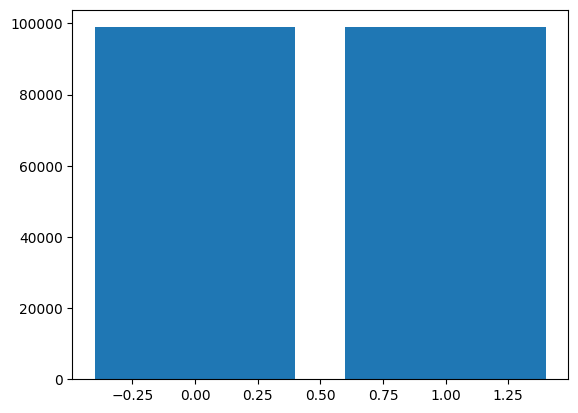

In [27]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)
count_and_plot(y_resampled)

In [28]:
print('Original dataset shape %s' % Counter(y_resampled))

Original dataset shape Counter({0: 98920, 1: 98920})


#### 3. 모델링

##### 3-1. 모델 생성 및 학습

In [29]:
from xgboost import XGBClassifier

XGB = XGBClassifier(booster='gbtree', n_estimators= 100, learning_rate=0.03, max_depth=10, subsample=0.7, colsample_bytree=0.7000000000000001, colsample_bylevel=0.865584471569699, colsample_bynode=0.8851539508192925, reg_alpha=0.01363225382508013, reg_lambda=0.05583158097593165, min_child_weight=4, gamma=0.10848813150330286)

le = LabelEncoder()

y_resampled = le.fit_transform(y_resampled)

XGB.fit(X_resampled, y_resampled)

# pred2_val = XGB.predict(X_val)

# pred2_test = XGB.predict(X_test)

##### 3-2. 모델 저장

In [30]:
# # 파일명
filename = 'xgb_model.model'

# # 모델 저장
# pickle.dump(XGB, open(filename, 'wb'))

# # 모델 불러오기
xgb_model = pickle.load(open(filename, 'rb'))

##### 3-3. 성능 평가

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [32]:
pred2_train = xgb_model.predict(X_resampled)

print(Counter(pred2_train), Counter(y_resampled))
print(accuracy_score(y_resampled, pred2_train))

Counter({1: 101160, 0: 96680}) Counter({0: 98920, 1: 98920})
0.6601091791346543


In [35]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)
pred2_test = xgb_model.predict(X_test)

print("Accuracy Score of XGB Classifier = ", accuracy_score(y_test, pred2_test))
print("precision_score of XGB Classifier = ", precision_score(y_test, pred2_test, average='macro'))
print("recall_score of XGB Classifier = ", recall_score(y_test, pred2_test, average='macro'))

Accuracy Score of XGB Classifier =  0.6415113233708212
precision_score of XGB Classifier =  0.5982093580667045
recall_score of XGB Classifier =  0.6352100723980247


#### 4. 이벤트 구현

1. 유저가 데이터 값 입력

In [55]:
x = float(input())
y = float(input())
gd = int(input())
sp = int(input())
ms = int(input())
ps = int(input())
vs = int(input())
pk = int(input())
fk = int(input())
cv = int(input())
bc = int(input())
blc = int(input())
jh = int(input())
clm = int(input())
type = int(input())
position= input()

2. 입력 값을 모델 input으로 넣기 위한 처리 과정

In [41]:
def shooting(x,y,gd,sp,ms,ps,vs,pk,fk,cv,bc,blc,jh,clm,type,position):

    import itertools

    distance = np.sqrt((x - 1)**2 + (y - 0.5)**2)

    transform_values = []

    transform_values.append((train_mm.transform([[gd,sp,ms,ps,vs,pk,fk,cv,bc,blc,jh,clm]])).tolist()[0])

    transform_values = list(itertools.chain(*transform_values))

    transform_values.insert(0,distance)

    transform_values.insert(1,x)

    transform_values.insert(2,y)

    transform_values.append(type)

    transform_values.append(position)

    return transform_values


In [57]:
shooting(x,y,gd,sp,ms,ps,vs,pk,fk,cv,bc,blc,jh,clm,type,position)

c:\Users\thoma\anaconda3\envs\t_academy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[0.12083045973594572,
 0.89,
 0.55,
 0.8333333333333333,
 0.8061224489795918,
 0.8288288288288288,
 0.8125,
 0.8571428571428572,
 0.8217821782178217,
 0.8288288288288288,
 0.8214285714285714,
 0.8080808080808082,
 0.7407407407407407,
 0.7908496732026143,
 0.7468354430379748,
 5,
 'ST']

In [52]:
def shoot_predict(transform_values):

    input_df = pd.DataFrame(columns=['distance', 'x', 'y', '골 결정력', '슛 파워', '중거리 슛', '위치 선정', '발리 슛',
       '페널티 킥', '프리킥', '커브', '볼 컨트롤', '밸런스', '점핑 헤더', '침착성','type','포지션', 'type_1',
       'type_2', 'type_3', 'type_4', 'type_5', 'type_6', 'type_7', 'type_8',
       'type_9', 'type_10', '포지션_CAM', '포지션_CB', '포지션_CDM', '포지션_CF', '포지션_CM',
       '포지션_GK', '포지션_LB', '포지션_LM', '포지션_LW', '포지션_LWB', '포지션_RB', '포지션_RF',
       '포지션_RM', '포지션_RW', '포지션_RWB', '포지션_ST'])
        
    input_df = input_df.append(pd.Series(transform_values, index=['distance', 'x', 'y', '골 결정력', '슛 파워', '중거리 슛', '위치 선정', '발리 슛',
        '페널티 킥', '프리킥', '커브', '볼 컨트롤', '밸런스', '점핑 헤더', '침착성','type','포지션']),ignore_index=True)

    input_df.iloc[0,16+int(type)] = 1 # 슈팅 타입 dummy 셀프 생성
    input_df.loc[0,'포지션_{}'.format(position)] = 1 # 포지션 dummy 셀프 생성
    input_df = input_df.drop(['type','포지션'],axis=1)

    input_df = input_df.fillna(0)

    result = xgb_model.predict(input_df)[0]

    if result == 0:

        p = 'No Goal'

    else:
        p = 'Goal'

    return result, p

In [58]:
shoot_predict(transform_values)

C:\Users\thoma\AppData\Local\Temp\ipykernel_24384\3823279719.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  input_df = input_df.append(pd.Series(transform_values, index=['distance', 'x', 'y', '골 결정력', '슛 파워', '중거리 슛', '위치 선정', '발리 슛',


(1, 'Goal')